In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
import optuna
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Dataset.csv")

In [5]:
df.columns

Index(['İlan Numarası', 'İlan Oluşturma Tarihi', 'Kullanım Durumu', 'Tipi',
       'Binanın Yaşı', 'Binanın Kat Sayısı', 'Net Metrekare', 'Brüt Metrekare',
       'Bulunduğu Kat', 'Site İçerisinde', 'Isıtma Tipi', 'Banyo Sayısı',
       'Oda Sayısı', 'Balkon Durumu', 'Aidat', 'Adres', 'Fiyat'],
      dtype='object')

In [3]:
df.head()

,İlan Numarası,İlan Oluşturma Tarihi,Kullanım Durumu,Tipi,Binanın Yaşı,Binanın Kat Sayısı,Net Metrekare,Brüt Metrekare,Bulunduğu Kat,Site İçerisinde,Isıtma Tipi,Banyo Sayısı,Oda Sayısı,Balkon Durumu,Aidat,Adres,Fiyat
0,18480964,24 Kasım 2025,Boş,Daire,21 Ve Üzeri,4,120 m²,130 m²,3.Kat,Hayır,Kombi Doğalgaz,1,3+1,Var,NaN,Ankara - Sincan - Osmanlı Mahallesi,20.5
1,18450964,19 Kasım 2025,Boş,Daire,0 (Yeni),4,120 m²,130 m²,2.Kat,Hayır,Kombi Doğalgaz,2,3+1,Var,NaN,Ankara - Sincan - Fevzi Çakmak Mahallesi,25.0
2,18437087,17 Kasım 2025,Boş,Daire,0 (Yeni),4,55 m²,60 m²,4.Kat,Hayır,Merkezi Doğalgaz,1,2+1,NaN,1 TL,Ankara - Çankaya - Konutkent Mahallesi,45.0
3,18270451,20 Ekim 2025,Boş,Daire,11-15,5,105 m²,120 m²,3.Kat,Hayır,Kombi Doğalgaz,2,3+1,Var,500 TL,Ankara - Sincan - 29 Ekim Mahallesi,25.0
4,18489170,25 Kasım 2025,Boş,Daire,16-20,4,130 m²,140 m²,2.Kat,Hayır,Kombi Doğalgaz,1,3+1,NaN,NaN,Ankara - Sincan - Malazgirt Mahallesi,19.5


In [4]:
df["Fiyat"] = df["Fiyat"] * 1000
df

,İlan Numarası,İlan Oluşturma Tarihi,Kullanım Durumu,Tipi,Binanın Yaşı,Binanın Kat Sayısı,Net Metrekare,Brüt Metrekare,Bulunduğu Kat,Site İçerisinde,Isıtma Tipi,Banyo Sayısı,Oda Sayısı,Balkon Durumu,Aidat,Adres,Fiyat
0,18480964,24 Kasım 2025,Boş,Daire,21 Ve Üzeri,4,120 m²,130 m²,3.Kat,Hayır,Kombi Doğalgaz,1,3+1,Var,NaN,Ankara - Sincan - Osmanlı Mahallesi,20500.0
1,18450964,19 Kasım 2025,Boş,Daire,0 (Yeni),4,120 m²,130 m²,2.Kat,Hayır,Kombi Doğalgaz,2,3+1,Var,NaN,Ankara - Sincan - Fevzi Çakmak Mahallesi,25000.0
2,18437087,17 Kasım 2025,Boş,Daire,0 (Yeni),4,55 m²,60 m²,4.Kat,Hayır,Merkezi Doğalgaz,1,2+1,NaN,1 TL,Ankara - Çankaya - Konutkent Mahallesi,45000.0
3,18270451,20 Ekim 2025,Boş,Daire,11-15,5,105 m²,120 m²,3.Kat,Hayır,Kombi Doğalgaz,2,3+1,Var,500 TL,Ankara - Sincan - 29 Ekim Mahallesi,25000.0
4,18489170,25 Kasım 2025,Boş,Daire,16-20,4,130 m²,140 m²,2.Kat,Hayır,Kombi Doğalgaz,1,3+1,NaN,NaN,Ankara - Sincan - Malazgirt Mahallesi,19500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18299870,NaN,Boş,Daire,21 Ve Üzeri,3,100 m²,110 m²,Yüksek Giriş,Hayır,Kombi Doğalgaz,1,3+1,NaN,NaN,Ankara - Çankaya - Yukarı Bahçelievler Mahallesi,38000.0
1466,18299869,NaN,Kiracı Oturuyor,Daire,21 Ve Üzeri,5,120 m²,130 m²,3.Kat,Hayır,Merkezi Doğalgaz,1,3+1,NaN,NaN,Ankara - Çankaya - Bahçelievler Mahallesi,45000.0
1467,18299575,NaN,Boş,Daire,21 Ve Üzeri,9,120 m²,130 m²,2.Kat,Evet,Kombi Doğalgaz,1,3+1,NaN,NaN,Ankara - Yenimahalle - Kentkoop Mahallesi,43250.0
1468,18299312,NaN,Boş,Daire,11-15,8,167 m²,188 m²,3.Kat,Evet,Merkezi (Pay Ölçer),2,3+1,NaN,NaN,Ankara - Çankaya - Yıldızevler Mahallesi,90000.0


#### Analyzing 'İlan Oluşturma Tarihi'

In [5]:
df["İlan Oluşturma Tarihi"].isnull().sum()

791

In [6]:
Year = df['İlan Oluşturma Tarihi'].astype(str).str.split().str[-1]
Month = df['İlan Oluşturma Tarihi'].astype(str).str.split().str[-2]
print(Year.unique())
print(Month.unique())

['2025' 'nan']
['Kasım' 'Ekim' nan]


Bütün ilanlar 2025 kasım ve ekim aylarında oluşturulmuş, çok fazla bir anlam ifade etmiyor bu yüzden İlan Oluşturma Tarihini verisetinden kaldırma kararı aldık

In [7]:
df.drop(['İlan Numarası', 'İlan Oluşturma Tarihi'], axis = True, inplace = True)

In [8]:
df.shape

(1470, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Kullanım Durumu     1470 non-null   object 
 1   Tipi                1470 non-null   object 
 2   Binanın Yaşı        1470 non-null   object 
 3   Binanın Kat Sayısı  1470 non-null   int64  
 4   Net Metrekare       1470 non-null   object 
 5   Brüt Metrekare      1470 non-null   object 
 6   Bulunduğu Kat       1452 non-null   object 
 7   Site İçerisinde     1470 non-null   object 
 8   Isıtma Tipi         1470 non-null   object 
 9   Banyo Sayısı        1470 non-null   object 
 10  Oda Sayısı          1470 non-null   object 
 11  Balkon Durumu       210 non-null    object 
 12  Aidat               402 non-null    object 
 13  Adres               1470 non-null   object 
 14  Fiyat               1470 non-null   float64
dtypes: float64(1), int64(1), object(13)
memory usage: 172.4

In [10]:
df.isnull().sum()

Kullanım Durumu          0
Tipi                     0
Binanın Yaşı             0
Binanın Kat Sayısı       0
Net Metrekare            0
Brüt Metrekare           0
Bulunduğu Kat           18
Site İçerisinde          0
Isıtma Tipi              0
Banyo Sayısı             0
Oda Sayısı               0
Balkon Durumu         1260
Aidat                 1068
Adres                    0
Fiyat                    0
dtype: int64

#### Handle adres column

In [11]:
df["Adres"].nunique()

320

In [12]:
df["Adres"] = df["Adres"].str.replace("Ankara - ", "", regex=False)
df[['Ilce', 'Mahalle']] = df['Adres'].str.split(' - ', n=1, expand=True)
df.drop(['Adres'], axis=1, inplace=True)
df["Ilce"].value_counts()

Ilce
Çankaya          353
Keçiören         290
Etimesgut        185
Sincan           157
Mamak            135
Yenimahalle      126
Gölbaşı           70
Altındağ          68
Pursaklar         34
Polatlı           22
Çubuk             10
Kahramankazan     10
Akyurt             4
Beypazarı          4
Bala               1
Haymana            1
Name: count, dtype: int64

In [13]:
df.head(3)

,Kullanım Durumu,Tipi,Binanın Yaşı,Binanın Kat Sayısı,Net Metrekare,Brüt Metrekare,Bulunduğu Kat,Site İçerisinde,Isıtma Tipi,Banyo Sayısı,Oda Sayısı,Balkon Durumu,Aidat,Fiyat,Ilce,Mahalle
0,Boş,Daire,21 Ve Üzeri,4,120 m²,130 m²,3.Kat,Hayır,Kombi Doğalgaz,1,3+1,Var,NaN,20500.0,Sincan,Osmanlı Mahallesi
1,Boş,Daire,0 (Yeni),4,120 m²,130 m²,2.Kat,Hayır,Kombi Doğalgaz,2,3+1,Var,NaN,25000.0,Sincan,Fevzi Çakmak Mahallesi
2,Boş,Daire,0 (Yeni),4,55 m²,60 m²,4.Kat,Hayır,Merkezi Doğalgaz,1,2+1,NaN,1 TL,45000.0,Çankaya,Konutkent Mahallesi


In [14]:
unique_values = df.nunique()
data_types = df.dtypes
missing_values = df.isnull().sum()
null_percentage = (df.isnull().sum() / len(df)) * 100
summary_df = pd.DataFrame({
    'Data Types': data_types,
    'Unique Values': unique_values,
    'Null Values': missing_values,
    "Null Percentage": null_percentage
})
summary_df = pd.concat([summary_df])
summary_df

,Data Types,Unique Values,Null Values,Null Percentage
Kullanım Durumu,object,3,0,0.000000
Tipi,object,4,0,0.000000
Binanın Yaşı,object,9,0,0.000000
Binanın Kat Sayısı,int64,33,0,0.000000
Net Metrekare,object,117,0,0.000000
Brüt Metrekare,object,124,0,0.000000
Bulunduğu Kat,object,34,18,1.224490
Site İçerisinde,object,2,0,0.000000
Isıtma Tipi,object,9,0,0.000000
Banyo Sayısı,object,7,0,0.000000


In [15]:
df['Balkon Durumu'].value_counts()

Balkon Durumu
Var    190
Yok     20
Name: count, dtype: int64

#### Convert Aidat, Net Metrekare, Brüt Metrekare columns from object to integer

In [16]:
df['Aidat'] = df['Aidat'].str.replace(' TL', '')
df['Net Metrekare'] = df['Net Metrekare'].str.replace(' m²', '')
df['Brüt Metrekare'] = df['Brüt Metrekare'].str.replace(' m²', '')

In [17]:
df['Aidat'] = pd.to_numeric(df['Aidat'])
df['Net Metrekare'] = pd.to_numeric(df['Net Metrekare'])
df['Brüt Metrekare'] = pd.to_numeric(df['Brüt Metrekare'])

### Imputation

In [18]:
df["Bulunduğu Kat"].fillna(df['Bulunduğu Kat'].mode()[0], inplace = True)
df['Balkon Durumu'].fillna(df['Balkon Durumu'].mode()[0], inplace = True)

In [19]:
df.loc[df['Aidat'] < 50, 'Aidat'] = np.nan

df['Aidat'] = df['Aidat'].fillna(
    df.groupby(['Ilce', 'Site İçerisinde'])['Aidat'].transform('median')
)

df['Aidat'] = df['Aidat'].fillna(df['Aidat'].median())

print(df['Aidat'].describe())

count     1470.000000
mean       628.953741
std        890.519183
min         50.000000
25%        200.000000
50%        275.000000
75%        850.000000
max      14000.000000
Name: Aidat, dtype: float64


In [20]:
df.head(3)

,Kullanım Durumu,Tipi,Binanın Yaşı,Binanın Kat Sayısı,Net Metrekare,Brüt Metrekare,Bulunduğu Kat,Site İçerisinde,Isıtma Tipi,Banyo Sayısı,Oda Sayısı,Balkon Durumu,Aidat,Fiyat,Ilce,Mahalle
0,Boş,Daire,21 Ve Üzeri,4,120,130,3.Kat,Hayır,Kombi Doğalgaz,1,3+1,Var,200.0,20500.0,Sincan,Osmanlı Mahallesi
1,Boş,Daire,0 (Yeni),4,120,130,2.Kat,Hayır,Kombi Doğalgaz,2,3+1,Var,200.0,25000.0,Sincan,Fevzi Çakmak Mahallesi
2,Boş,Daire,0 (Yeni),4,55,60,4.Kat,Hayır,Merkezi Doğalgaz,1,2+1,Var,850.0,45000.0,Çankaya,Konutkent Mahallesi


## Visualization

In [21]:
def grab_col_names(dataframe, cat_th=10):
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    
    cat_cols = cat_cols + num_but_cat

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    return cat_cols, num_cols


cat_cols, num_cols = grab_col_names(df)

print(f'cat cols {cat_cols}')
print(f'num cols {num_cols}')

Observations: 1470
Variables: 16
cat_cols: 11
num_cols: 5
cat cols ['Kullanım Durumu', 'Tipi', 'Binanın Yaşı', 'Bulunduğu Kat', 'Site İçerisinde', 'Isıtma Tipi', 'Banyo Sayısı', 'Oda Sayısı', 'Balkon Durumu', 'Ilce', 'Mahalle']
num cols ['Binanın Kat Sayısı', 'Net Metrekare', 'Brüt Metrekare', 'Aidat', 'Fiyat']


********************* For Binanın Kat Sayısı *********************
count    1470.000000
mean        6.076190
std         5.453902
min         1.000000
25%         3.000000
50%         4.000000
75%         7.000000
max        44.000000
Name: Binanın Kat Sayısı, dtype: float64



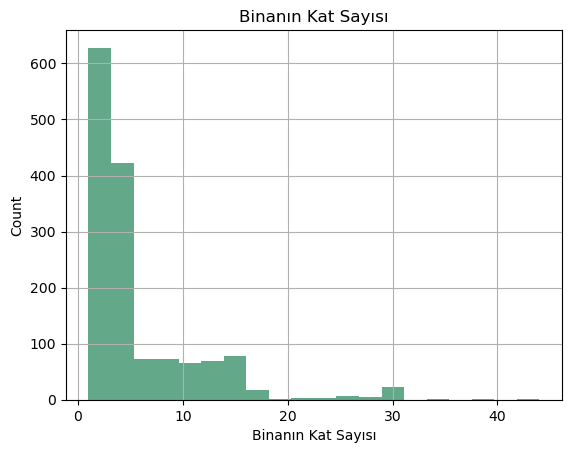


********************* For Net Metrekare *********************
count    1470.000000
mean      109.286395
std        48.368286
min        15.000000
25%        85.000000
50%       110.000000
75%       120.000000
max       654.000000
Name: Net Metrekare, dtype: float64



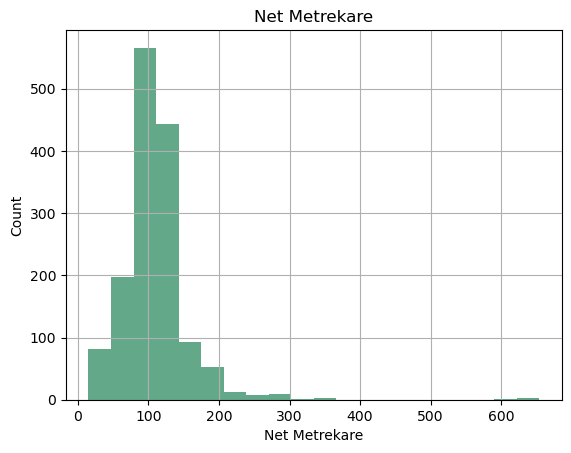


********************* For Brüt Metrekare *********************
count    1470.000000
mean      122.012245
std        54.445692
min        20.000000
25%        96.000000
50%       120.000000
75%       135.000000
max       700.000000
Name: Brüt Metrekare, dtype: float64



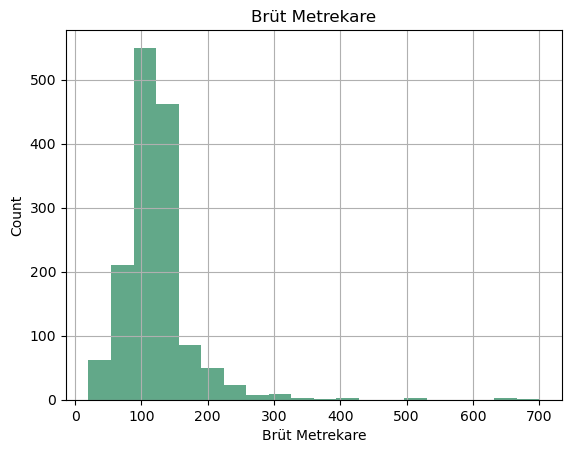


********************* For Aidat *********************
count     1470.000000
mean       628.953741
std        890.519183
min         50.000000
25%        200.000000
50%        275.000000
75%        850.000000
max      14000.000000
Name: Aidat, dtype: float64



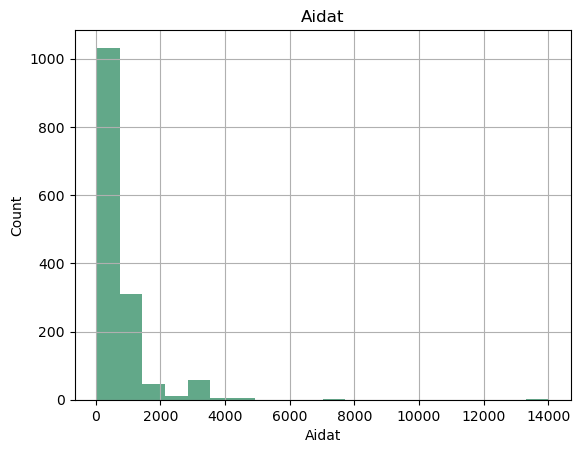


********************* For Fiyat *********************
count      1470.000000
mean      30961.140816
std       25425.922012
min        8000.000000
25%       21000.000000
50%       25825.000000
75%       35000.000000
max      560000.000000
Name: Fiyat, dtype: float64



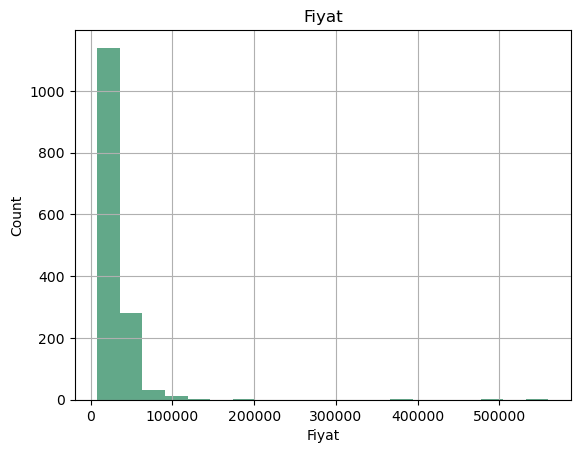

In [22]:
def num_summary(dataframe, numerical_col, plot=False):
    print(dataframe[numerical_col].describe().T)
    print()
    if plot:
        dataframe[numerical_col].hist(bins=20, color = '#1F8357', alpha = 0.7)
        plt.xlabel(numerical_col)
        plt.ylabel('Count')
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    print("********************* For " + str(col) + " *********************")
    num_summary(df, col, plot=True)
    print()


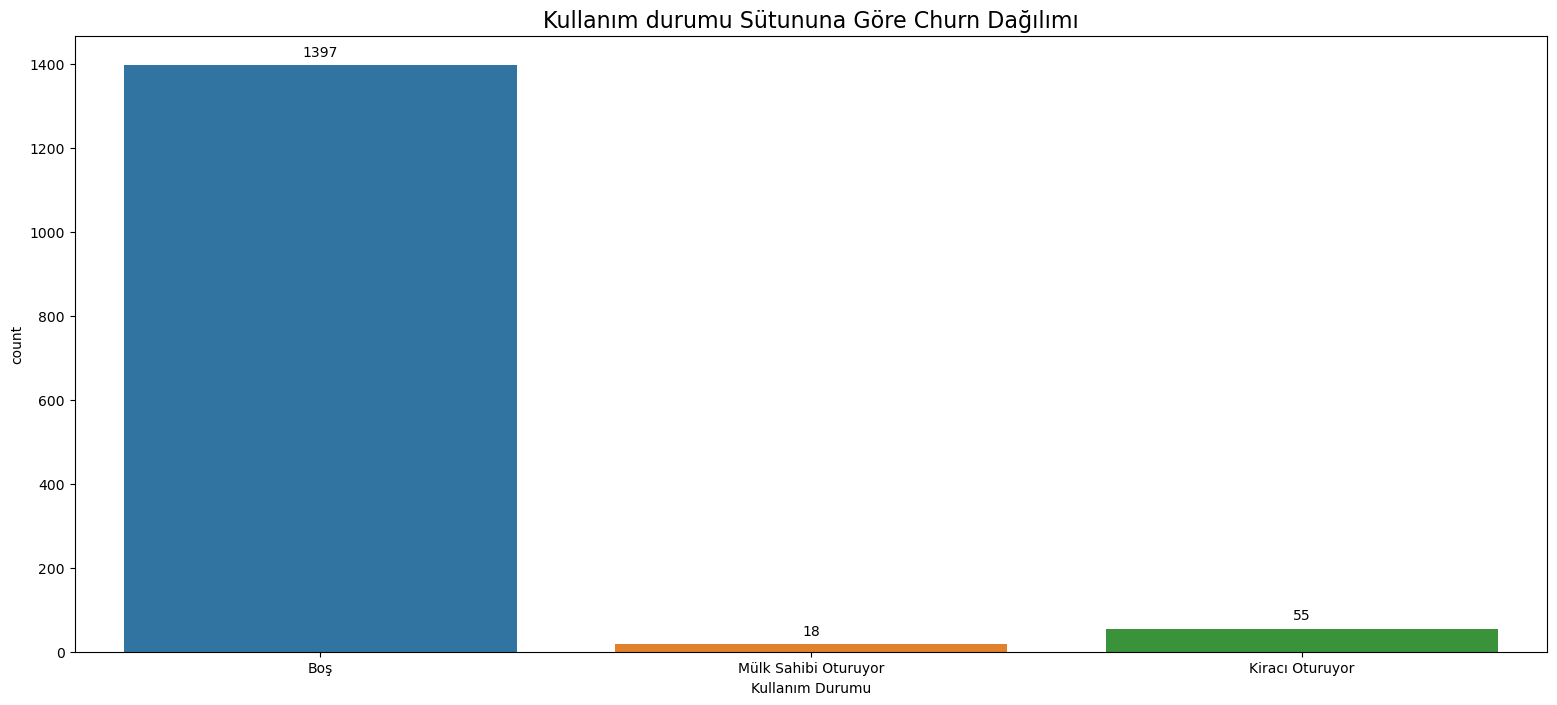

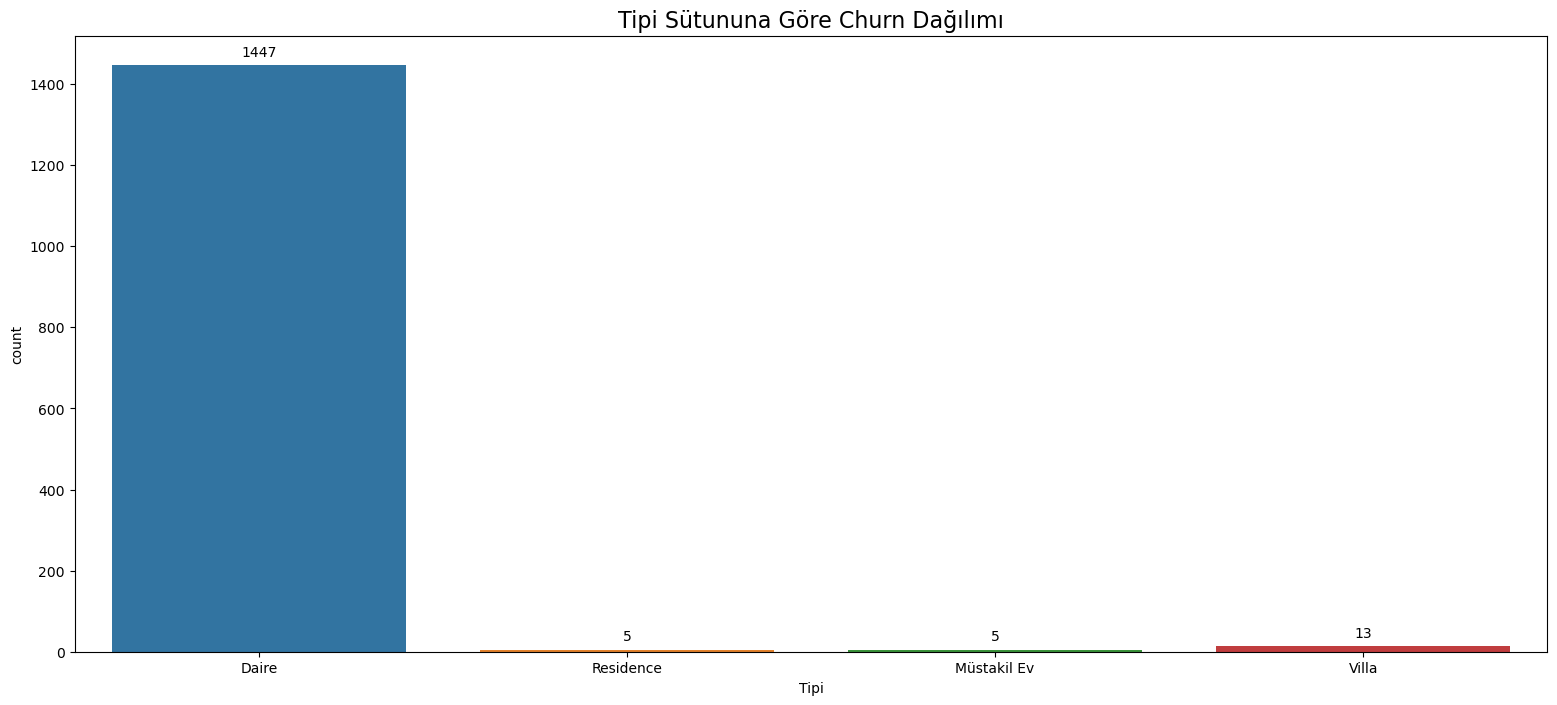

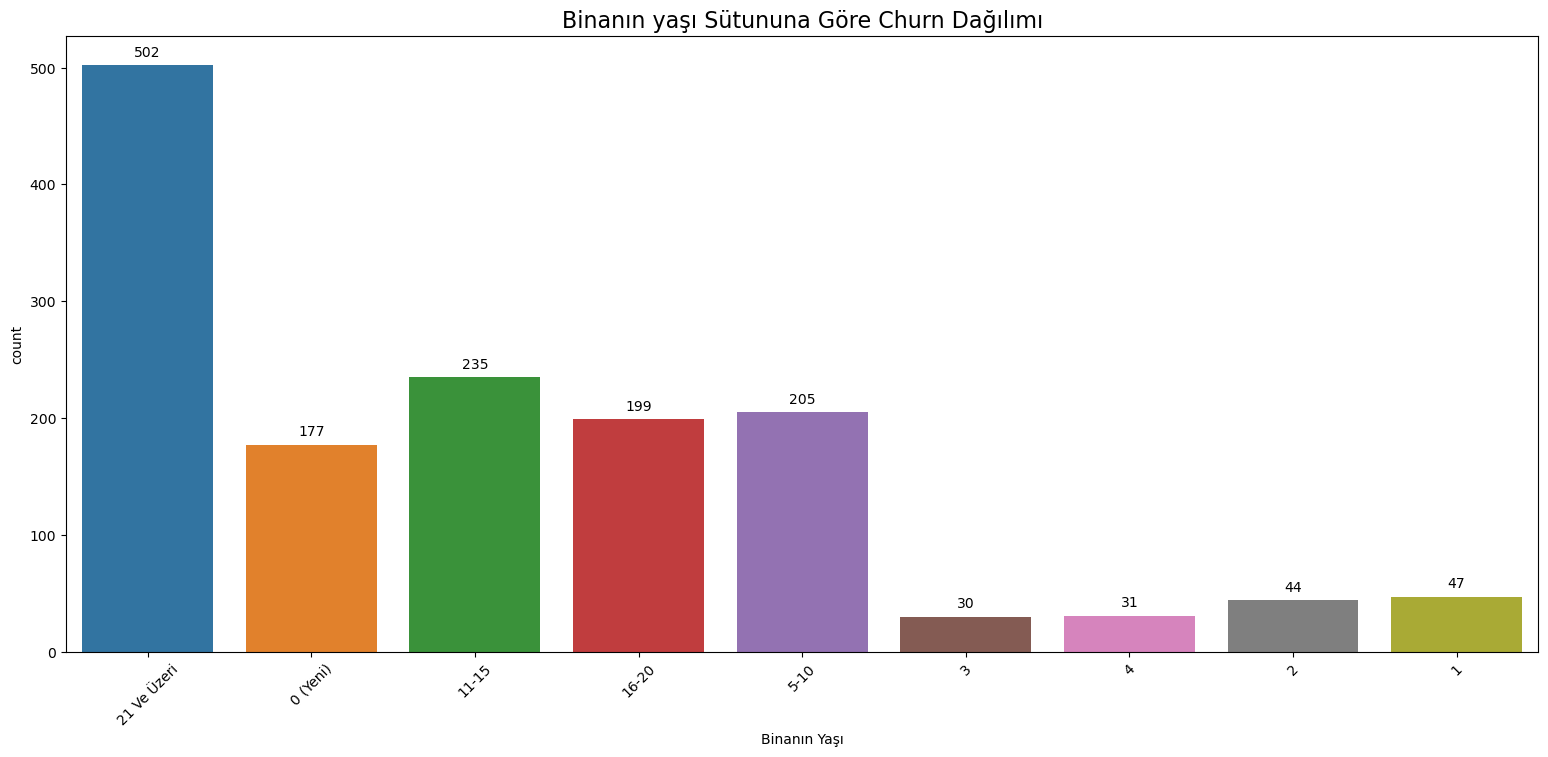

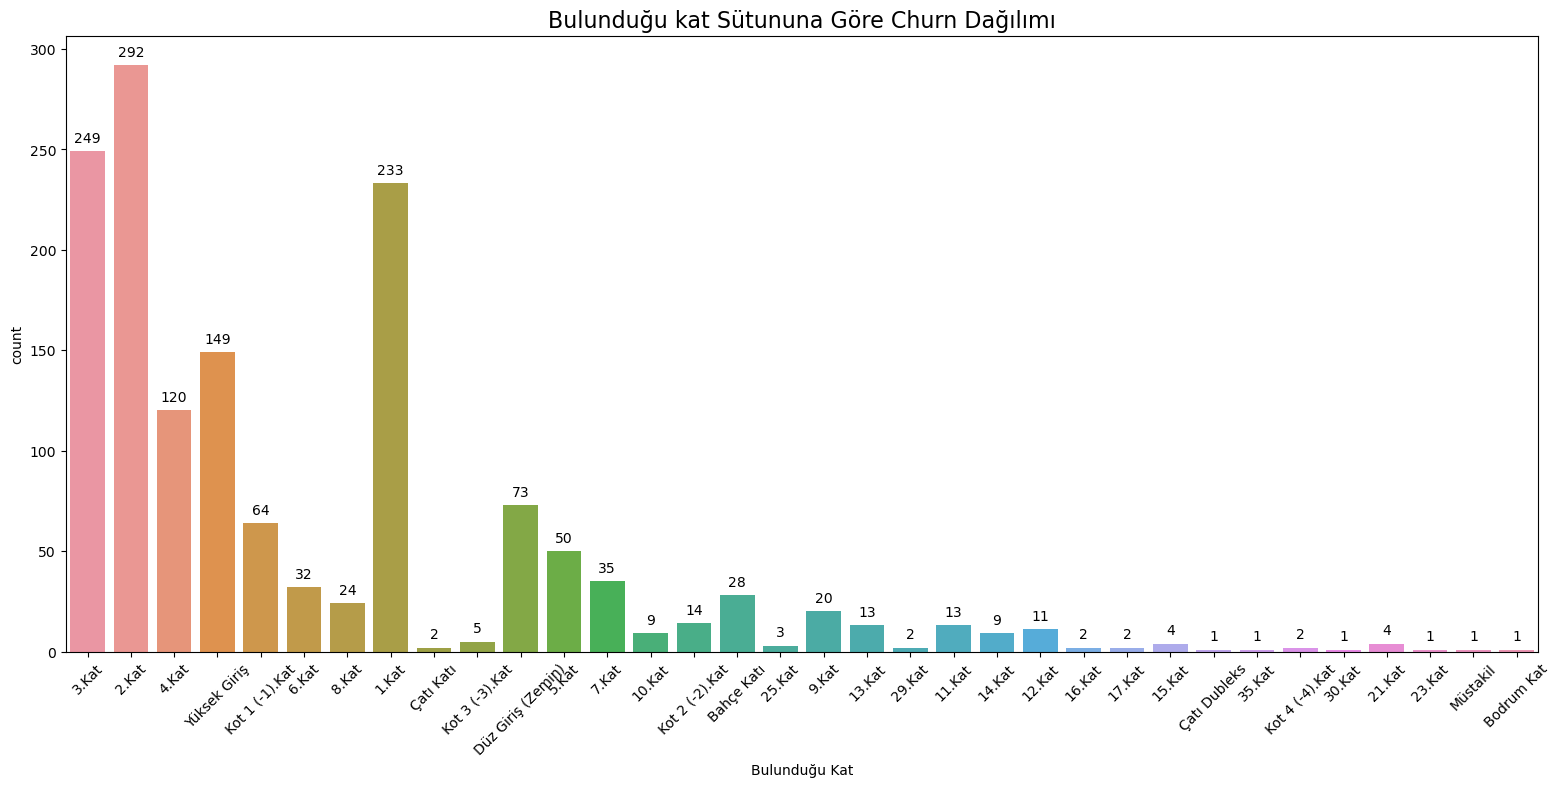

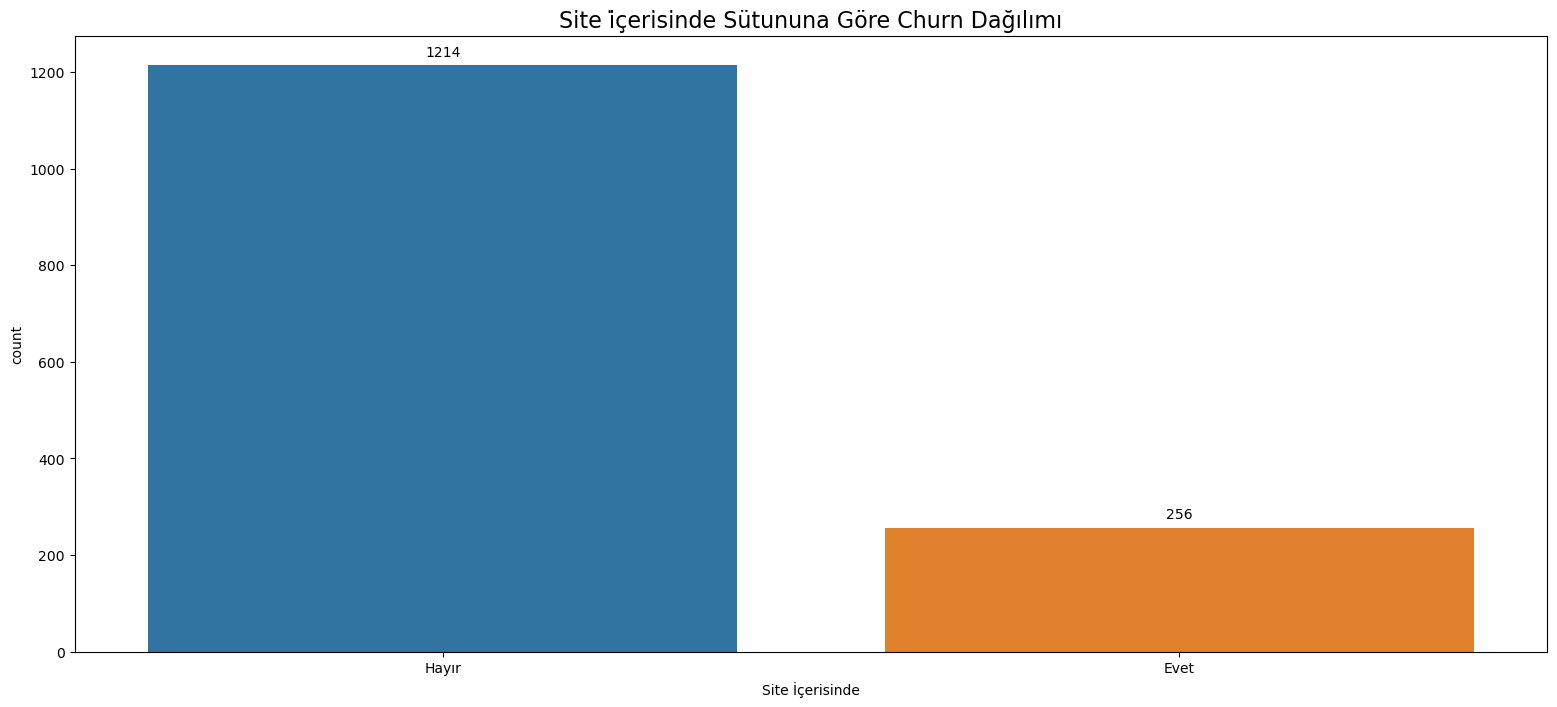

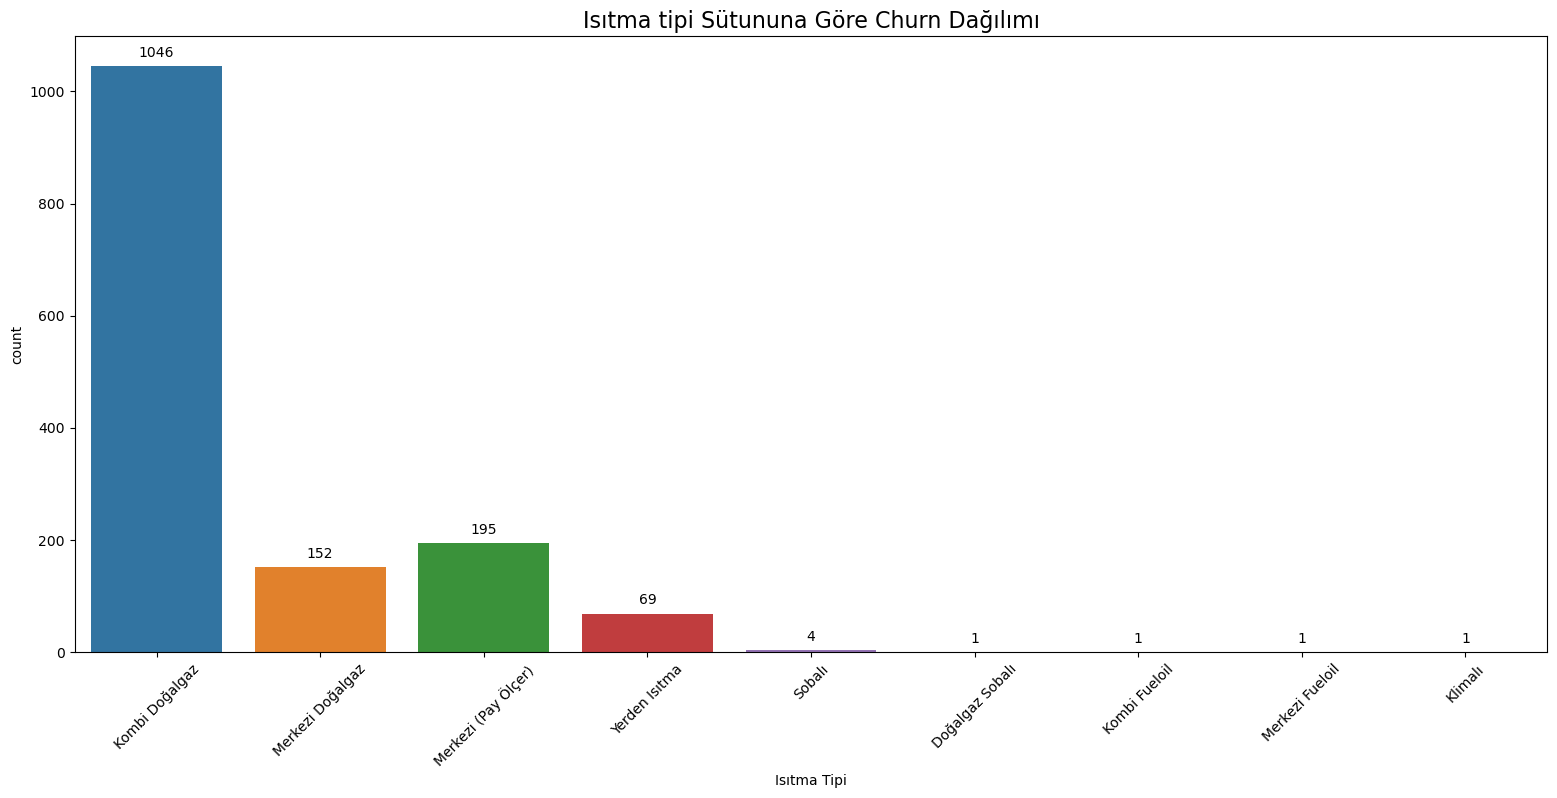

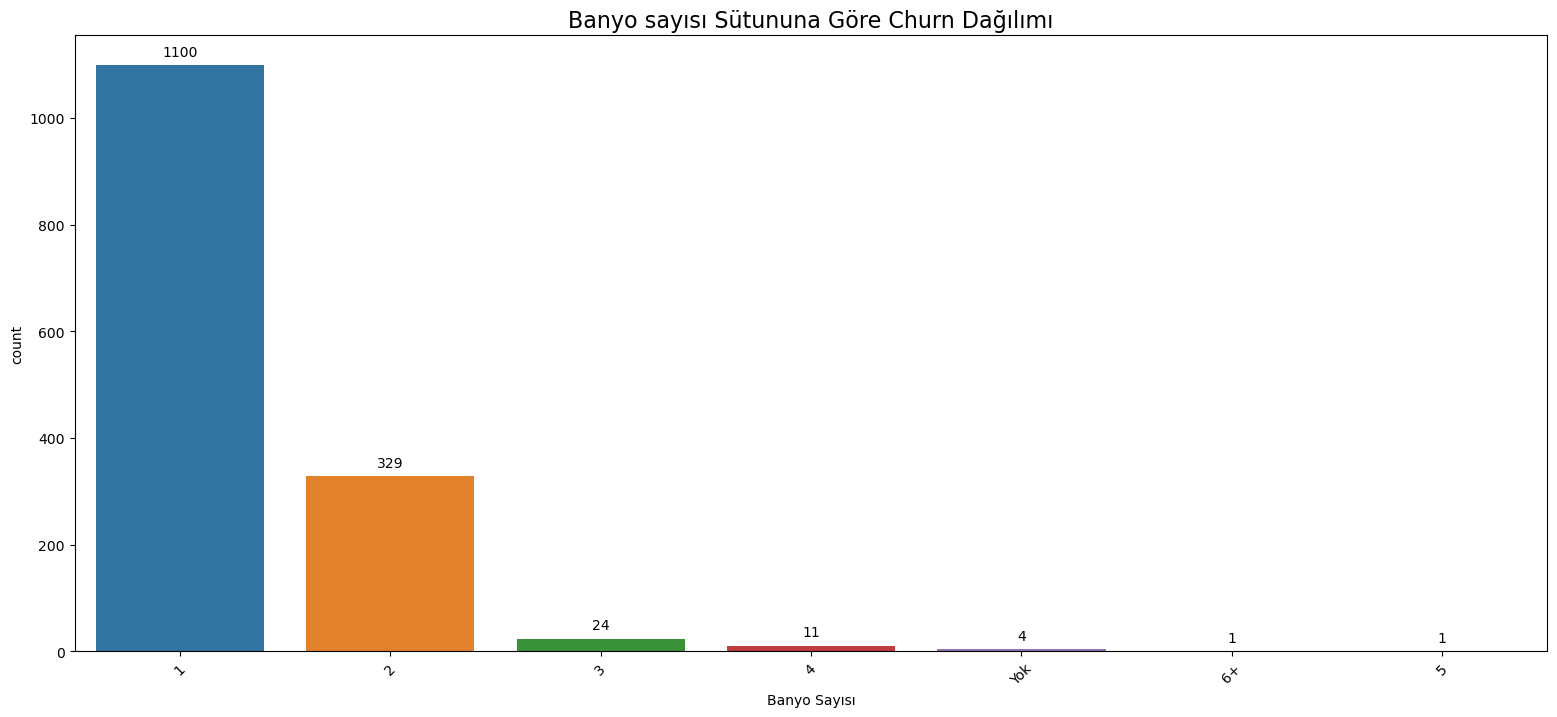

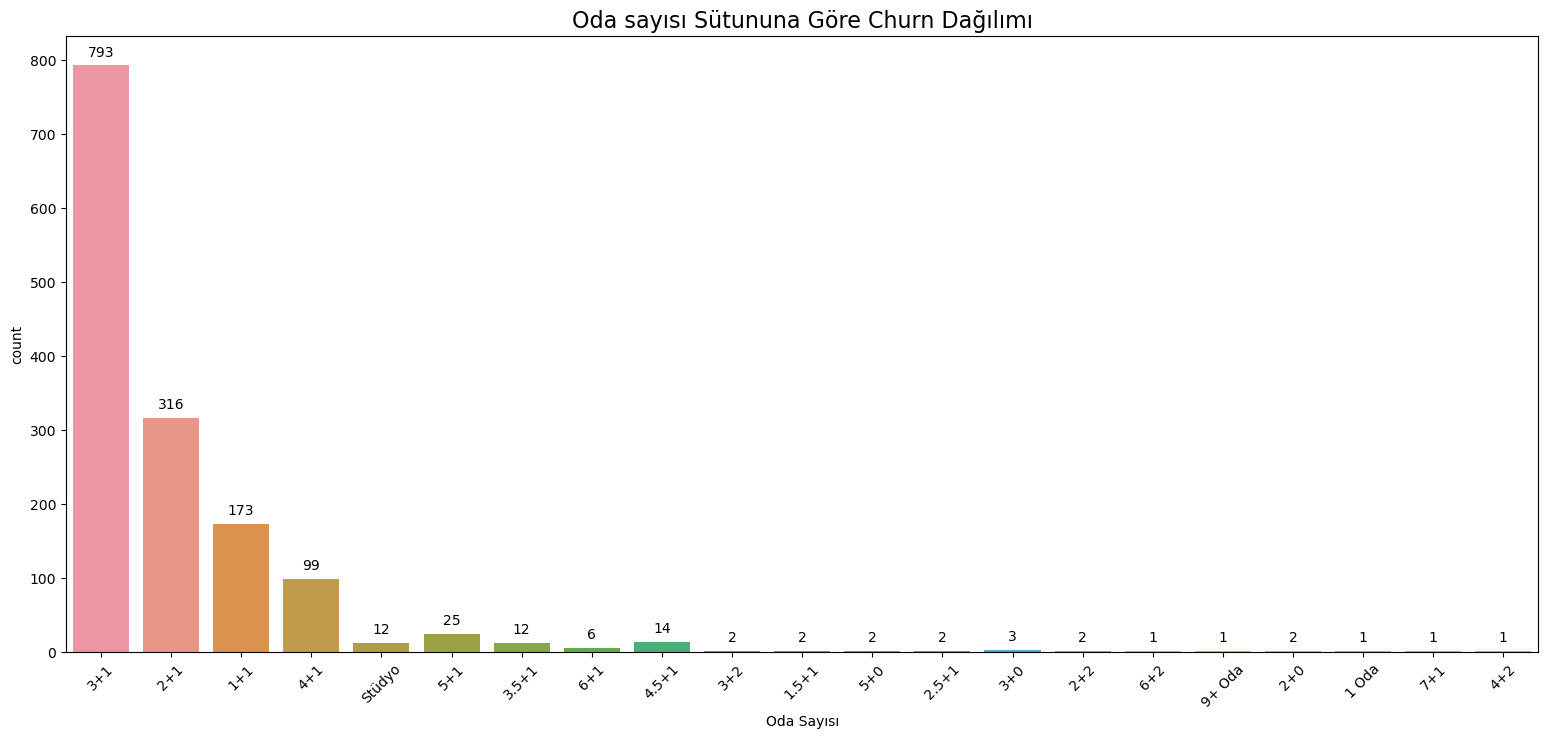

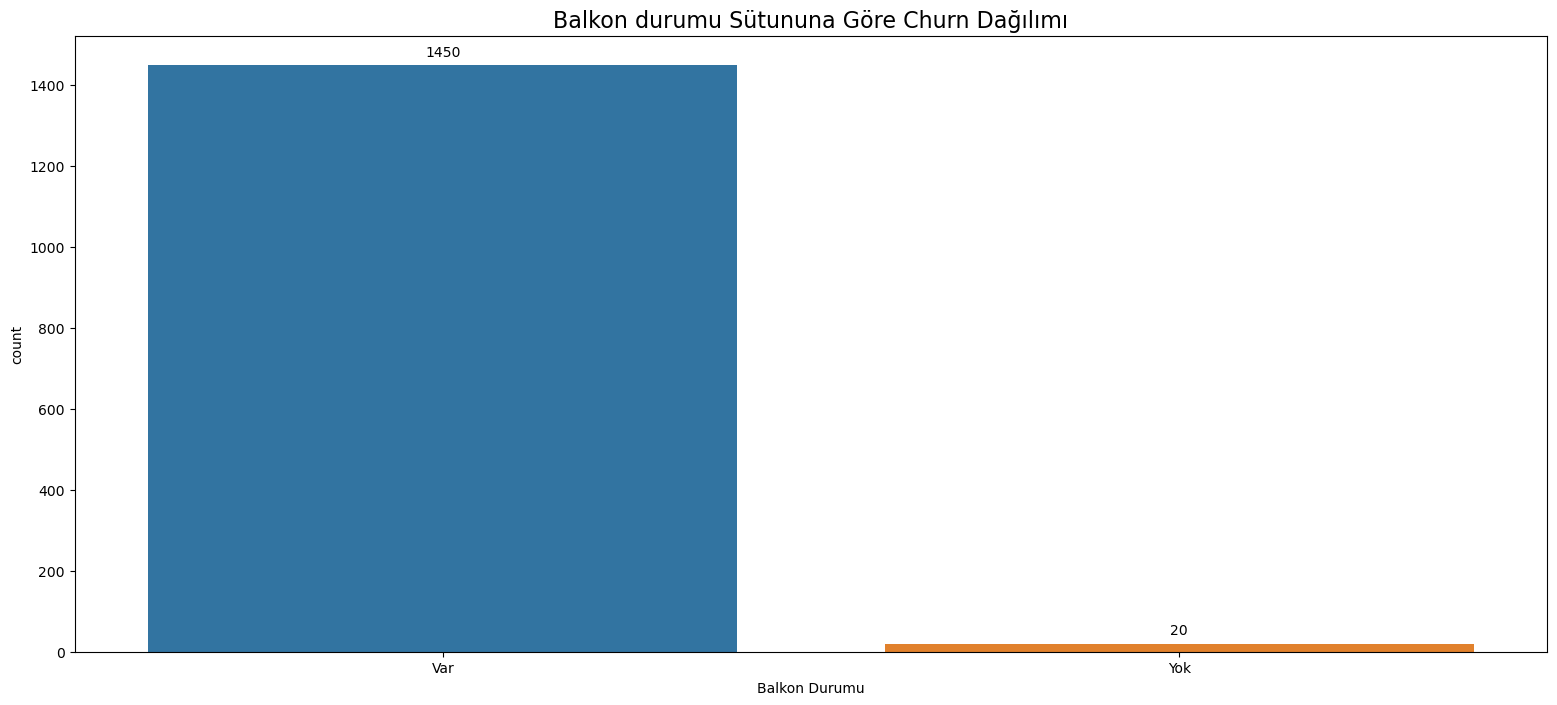

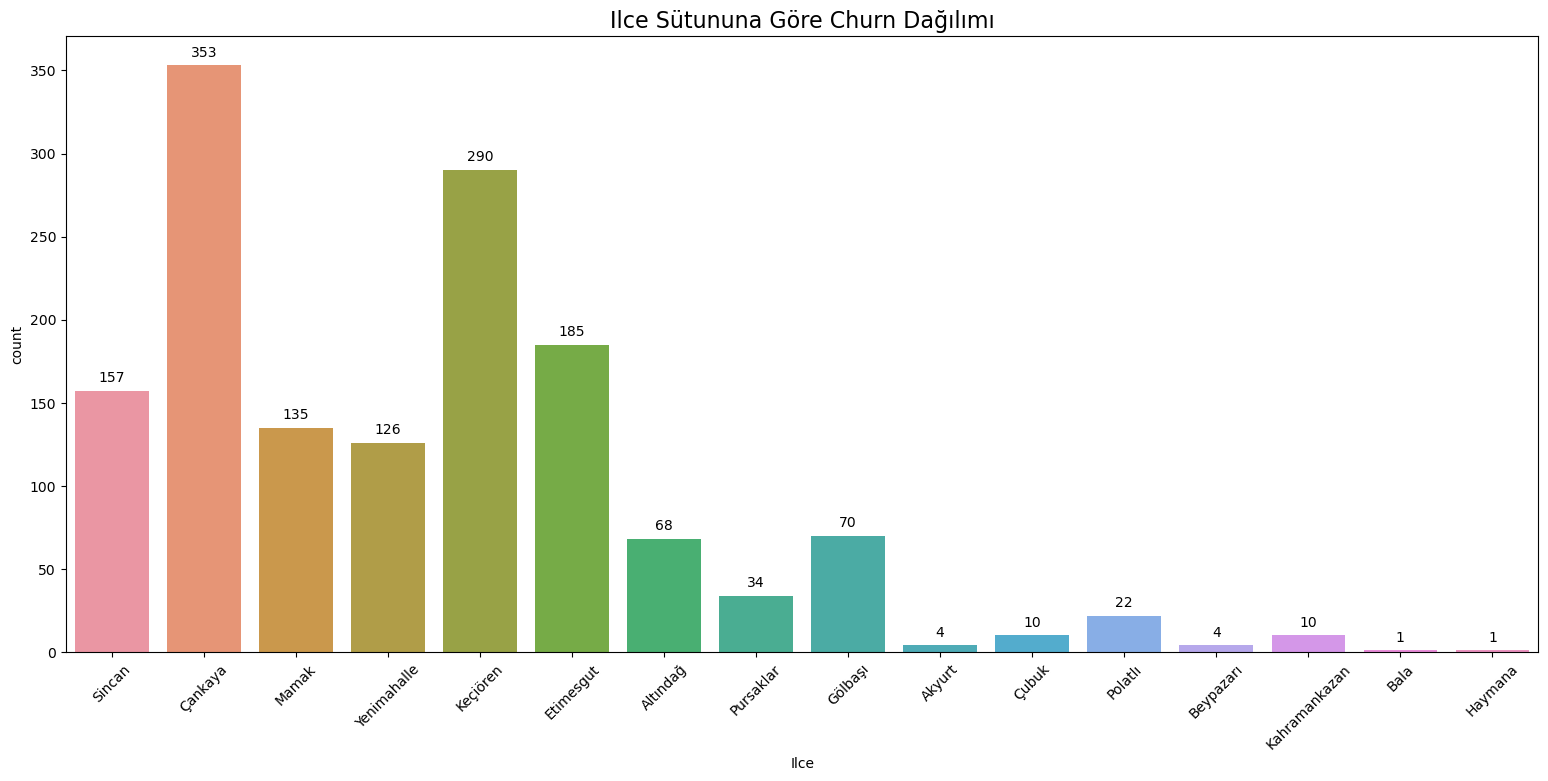

In [23]:
categorical_columns = cat_cols
categorical_columns = [col for col in categorical_columns if col != 'Mahalle']

for column in categorical_columns:
    plt.figure(figsize=(19, 8)) 
    
    plt.title(f'{column.capitalize()} Sütununa Göre Churn Dağılımı', fontsize=16)
    
    ax = sns.countplot(x=column, data=df)
    
    for patch in ax.patches:
        height = patch.get_height()
        
        ax.text(
            x=patch.get_x() + patch.get_width() / 2.,
            y=height + (ax.get_ylim()[1] * 0.01), 
            s=f'{int(height)}',
            ha='center',
            va='bottom', 
            fontsize=10 
        )

    if df[column].nunique() > 5:
        plt.xticks(rotation=45)
        
    plt.show()

In [26]:
num_cols_corr = [col for col in num_cols if col != 'Fiyat']

corr_df = df[num_cols_corr + ['Fiyat']].corr()
price_corr = corr_df['Fiyat'].sort_values(ascending=False)
print(price_corr)



Fiyat                 1.000000
Net Metrekare         0.477496
Brüt Metrekare        0.464360
Aidat                 0.376368
Binanın Kat Sayısı    0.242916
Name: Fiyat, dtype: float64


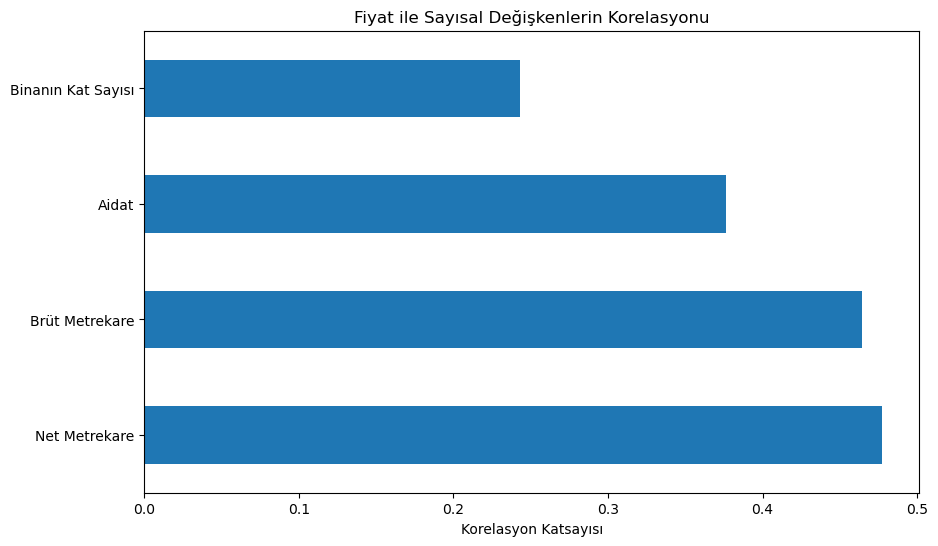

In [27]:
plt.figure(figsize=(10, 6))
price_corr.drop('Fiyat').plot(kind='barh')
plt.title('Fiyat ile Sayısal Değişkenlerin Korelasyonu')
plt.xlabel('Korelasyon Katsayısı')
plt.show()


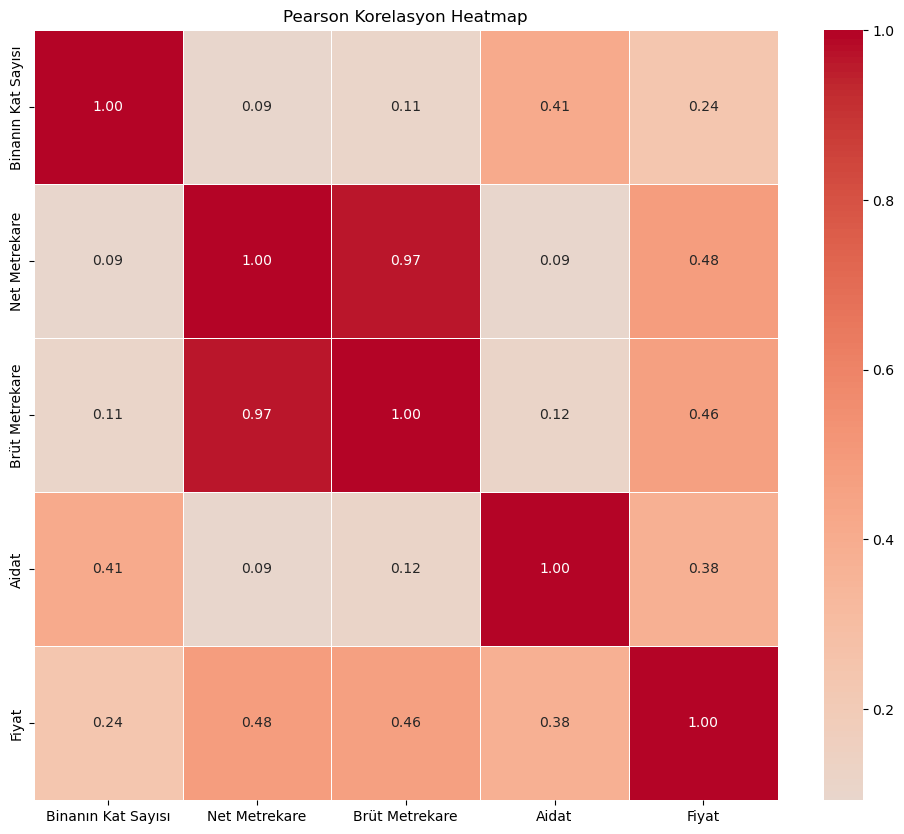

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_df,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Pearson Korelasyon Heatmap")
plt.show()



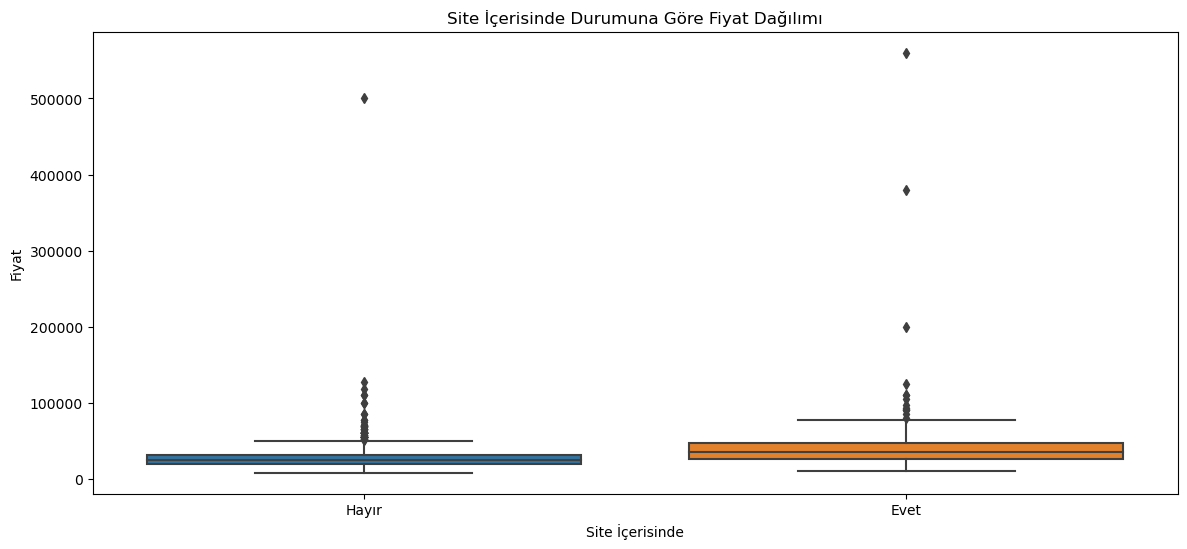

In [29]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Site İçerisinde', y='Fiyat', data=df)
plt.title('Site İçerisinde Durumuna Göre Fiyat Dağılımı')
plt.show()


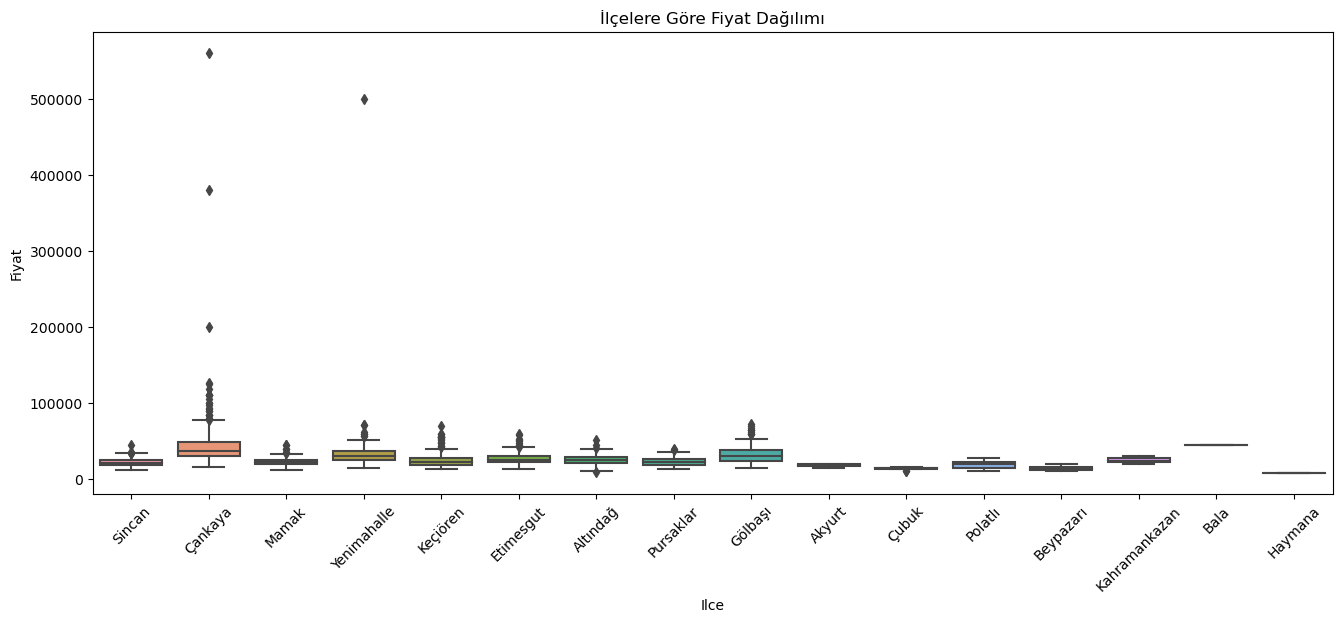

In [30]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='Ilce', y='Fiyat', data=df)
plt.xticks(rotation=45)
plt.title('İlçelere Göre Fiyat Dağılımı')
plt.show()


In [31]:
site_yes = df[df['Site İçerisinde'] == 'Evet']['Fiyat']
site_no = df[df['Site İçerisinde'] == 'Hayır']['Fiyat']

ttest_ind(site_yes, site_no, equal_var=False)


Ttest_indResult(statistic=4.847115149592387, pvalue=2.1017347416332023e-06)

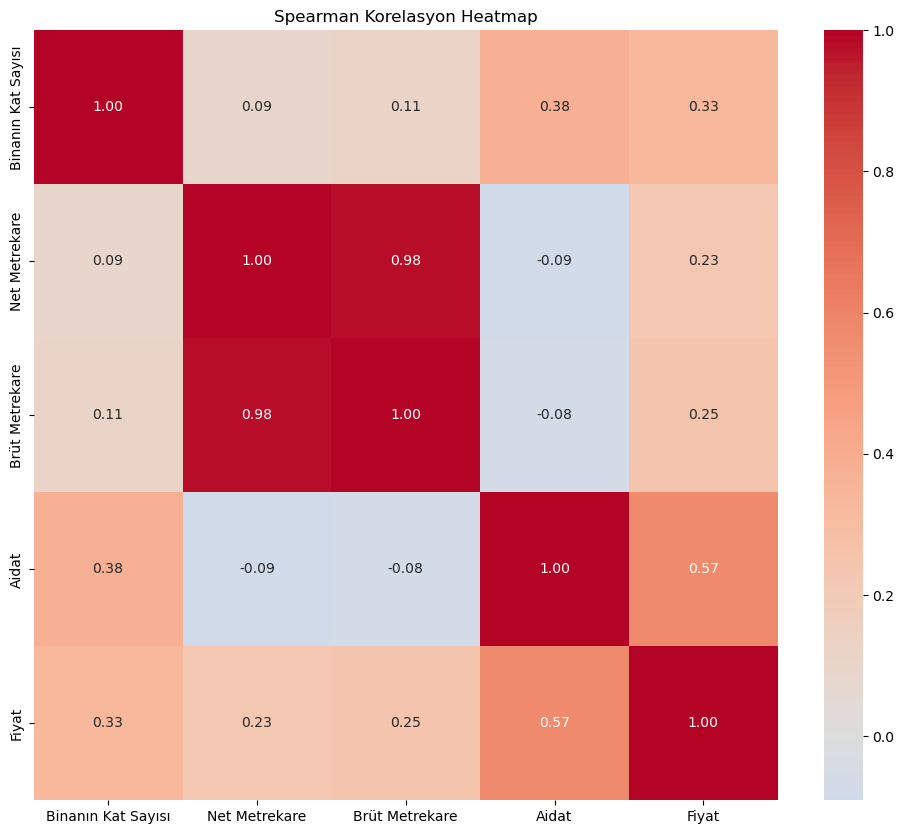

In [32]:
spearman_corr = df[num_cols_corr + ['Fiyat']].corr(method='spearman')

plt.figure(figsize=(12,10))
sns.heatmap(
    spearman_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Spearman Korelasyon Heatmap")
plt.show()


In [33]:
def calculate_outliers_percentage(df, numerical_columns):
    outlier_counts = {}
    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 4.5 * IQR # We multiplied the IQR value by 4.5, not by 1.5
        upper_bound = Q3 + 4.5 * IQR # We multiplied the IQR value by 4.5, not by 1.5

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    for column in outlier_counts:
        percentage = (outlier_counts[column] / len(df)) * 100
        print(f"Percentage of outliers in {column}: {percentage:.2f}%")

calculate_outliers_percentage(df, num_cols) 

Percentage of outliers in Binanın Kat Sayısı: 2.11%
Percentage of outliers in Net Metrekare: 1.09%
Percentage of outliers in Brüt Metrekare: 1.02%
Percentage of outliers in Aidat: 0.82%
Percentage of outliers in Fiyat: 0.95%


### Encoding

In [34]:
df.head()

,Kullanım Durumu,Tipi,Binanın Yaşı,Binanın Kat Sayısı,Net Metrekare,Brüt Metrekare,Bulunduğu Kat,Site İçerisinde,Isıtma Tipi,Banyo Sayısı,Oda Sayısı,Balkon Durumu,Aidat,Fiyat,Ilce,Mahalle
0,Boş,Daire,21 Ve Üzeri,4,120,130,3.Kat,Hayır,Kombi Doğalgaz,1,3+1,Var,200.0,20500.0,Sincan,Osmanlı Mahallesi
1,Boş,Daire,0 (Yeni),4,120,130,2.Kat,Hayır,Kombi Doğalgaz,2,3+1,Var,200.0,25000.0,Sincan,Fevzi Çakmak Mahallesi
2,Boş,Daire,0 (Yeni),4,55,60,4.Kat,Hayır,Merkezi Doğalgaz,1,2+1,Var,850.0,45000.0,Çankaya,Konutkent Mahallesi
3,Boş,Daire,11-15,5,105,120,3.Kat,Hayır,Kombi Doğalgaz,2,3+1,Var,500.0,25000.0,Sincan,29 Ekim Mahallesi
4,Boş,Daire,16-20,4,130,140,2.Kat,Hayır,Kombi Doğalgaz,1,3+1,Var,200.0,19500.0,Sincan,Malazgirt Mahallesi


In [36]:
df_copy = df.copy()

In [37]:
df_copy

,Kullanım Durumu,Tipi,Binanın Yaşı,Binanın Kat Sayısı,Net Metrekare,Brüt Metrekare,Bulunduğu Kat,Site İçerisinde,Isıtma Tipi,Banyo Sayısı,Oda Sayısı,Balkon Durumu,Aidat,Fiyat,Ilce,Mahalle
0,Boş,Daire,21 Ve Üzeri,4,120,130,3.Kat,Hayır,Kombi Doğalgaz,1,3+1,Var,200.0,20500.0,Sincan,Osmanlı Mahallesi
1,Boş,Daire,0 (Yeni),4,120,130,2.Kat,Hayır,Kombi Doğalgaz,2,3+1,Var,200.0,25000.0,Sincan,Fevzi Çakmak Mahallesi
2,Boş,Daire,0 (Yeni),4,55,60,4.Kat,Hayır,Merkezi Doğalgaz,1,2+1,Var,850.0,45000.0,Çankaya,Konutkent Mahallesi
3,Boş,Daire,11-15,5,105,120,3.Kat,Hayır,Kombi Doğalgaz,2,3+1,Var,500.0,25000.0,Sincan,29 Ekim Mahallesi
4,Boş,Daire,16-20,4,130,140,2.Kat,Hayır,Kombi Doğalgaz,1,3+1,Var,200.0,19500.0,Sincan,Malazgirt Mahallesi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Boş,Daire,21 Ve Üzeri,3,100,110,Yüksek Giriş,Hayır,Kombi Doğalgaz,1,3+1,Var,850.0,38000.0,Çankaya,Yukarı Bahçelievler Mahallesi
1466,Kiracı Oturuyor,Daire,21 Ve Üzeri,5,120,130,3.Kat,Hayır,Merkezi Doğalgaz,1,3+1,Var,850.0,45000.0,Çankaya,Bahçelievler Mahallesi
1467,Boş,Daire,21 Ve Üzeri,9,120,130,2.Kat,Evet,Kombi Doğalgaz,1,3+1,Var,650.0,43250.0,Yenimahalle,Kentkoop Mahallesi
1468,Boş,Daire,11-15,8,167,188,3.Kat,Evet,Merkezi (Pay Ölçer),2,3+1,Var,2950.0,90000.0,Çankaya,Yıldızevler Mahallesi


In [38]:
ohe_cols = ['Tipi', 'Kullanım Durumu']

binanın_yaşı = ['0 (Yeni)', '1', '2', '3', '4', '5-10', '11-15', '16-20', '21 Ve Üzeri']
bulunduğu_kat = ['Kot 4 (-4).Kat','Kot 3 (-3).Kat','Kot 2 (-2).Kat','Kot 1 (-1).Kat','Bodrum Kat','Düz Giriş (Zemin)','Bahçe Katı','Müstakil','Yüksek Giriş','1.Kat','2.Kat','3.Kat','4.Kat','5.Kat','6.Kat','7.Kat','8.Kat','9.Kat','10.Kat','11.Kat','12.Kat','13.Kat','14.Kat','15.Kat','16.Kat','17.Kat','21.Kat','23.Kat','25.Kat','29.Kat','30.Kat','35.Kat', 'Çatı Katı', 'Çatı Dubleks' ]
site_içerisinde = ['Hayır', 'Evet']
ısıtma_tipi = ['Sobalı','Doğalgaz Sobalı','Klimalı','Kombi Fueloil','Merkezi Fueloil','Merkezi Doğalgaz','Merkezi (Pay Ölçer)','Kombi Doğalgaz','Yerden Isıtma']
banyo_sayısı = ['Yok','1','2','3','4','5','6+']
oda_sayısı = ['Stüdyo','1 Oda','1+1','2+0','1.5+1','2+1','3+0','2.5+1','3+1','2+2', '3.5+1','4+1','3+2','5+0','4.5+1','5+1','4+2','6+1','6+2','7+1','9+ Oda']
balkon_durumu = ['Yok', 'Var']


ordinal_cols = [
    "Binanın Yaşı", "Bulunduğu Kat", "Site İçerisinde", 
    "Isıtma Tipi", "Banyo Sayısı", "Oda Sayısı", "Balkon Durumu"
]

ordinal_categories = [binanın_yaşı, bulunduğu_kat, site_içerisinde, ısıtma_tipi, banyo_sayısı, oda_sayısı, balkon_durumu]

nominal_cols = ['Ilce', 'Mahalle']

In [39]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ohe_cols),
        
        ('ordinal_manual', OrdinalEncoder(categories=ordinal_categories, 
                                          handle_unknown='use_encoded_value', 
                                          unknown_value=-1), ordinal_cols),
        
        ('ordinal_auto', OrdinalEncoder(handle_unknown='use_encoded_value', 
                                        unknown_value=-1), nominal_cols)
    ],
    remainder='passthrough', 
    verbose_feature_names_out=False 
)

processed_data = preprocessor.fit_transform(df)

feature_names = preprocessor.get_feature_names_out()
df = pd.DataFrame(processed_data, columns=feature_names)

In [40]:
df.head()

,Tipi_Daire,Tipi_Müstakil Ev,Tipi_Residence,Tipi_Villa,Kullanım Durumu_Boş,Kullanım Durumu_Kiracı Oturuyor,Kullanım Durumu_Mülk Sahibi Oturuyor,Binanın Yaşı,Bulunduğu Kat,Site İçerisinde,...,Banyo Sayısı,Oda Sayısı,Balkon Durumu,Ilce,Mahalle,Binanın Kat Sayısı,Net Metrekare,Brüt Metrekare,Aidat,Fiyat
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,11.0,0.0,...,1.0,8.0,1.0,12.0,189.0,4.0,120.0,130.0,200.0,20500.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,0.0,...,2.0,8.0,1.0,12.0,102.0,4.0,120.0,130.0,200.0,25000.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12.0,0.0,...,1.0,5.0,1.0,14.0,153.0,4.0,55.0,60.0,850.0,45000.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,11.0,0.0,...,2.0,8.0,1.0,12.0,3.0,5.0,105.0,120.0,500.0,25000.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,10.0,0.0,...,1.0,8.0,1.0,12.0,169.0,4.0,130.0,140.0,200.0,19500.0


In [41]:
df.columns

Index(['Tipi_Daire', 'Tipi_Müstakil Ev', 'Tipi_Residence', 'Tipi_Villa',
       'Kullanım Durumu_Boş', 'Kullanım Durumu_Kiracı Oturuyor',
       'Kullanım Durumu_Mülk Sahibi Oturuyor', 'Binanın Yaşı', 'Bulunduğu Kat',
       'Site İçerisinde', 'Isıtma Tipi', 'Banyo Sayısı', 'Oda Sayısı',
       'Balkon Durumu', 'Ilce', 'Mahalle', 'Binanın Kat Sayısı',
       'Net Metrekare', 'Brüt Metrekare', 'Aidat', 'Fiyat'],
      dtype='object')

In [42]:
df_copy.columns

Index(['Kullanım Durumu', 'Tipi', 'Binanın Yaşı', 'Binanın Kat Sayısı',
       'Net Metrekare', 'Brüt Metrekare', 'Bulunduğu Kat', 'Site İçerisinde',
       'Isıtma Tipi', 'Banyo Sayısı', 'Oda Sayısı', 'Balkon Durumu', 'Aidat',
       'Fiyat', 'Ilce', 'Mahalle'],
      dtype='object')

In [43]:
# enc_ordinal.categories_

### Model

In [45]:
X = df.drop(["Fiyat"], axis=1)
y = df["Fiyat"]

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [47]:
sd = StandardScaler()
x_train = sd.fit_transform(x_train)
x_test = sd.transform(x_test)

In [90]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'SVR': SVR(),
    "XGB Regressor": XGBRegressor(),
    "LGBM Regressor": LGBMRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose = False),
    'Dummy Regressor': DummyRegressor(strategy='mean')
}

results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    error = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, error, r2))
    print(f'{name}: Error = {error}, R² Score = {r2}')


Linear Regression: Error = 12625.713079394336, R² Score = 0.186277243443004
Random Forest Regressor: Error = 7897.559836487114, R² Score = 0.6816165530247769
Gradient Boosting Regressor: Error = 7620.626941760766, R² Score = 0.7035537002688297
AdaBoost Regressor: Error = 12579.777883581057, R² Score = 0.1921874867991068
Decision Tree Regressor: Error = 10299.700098170088, R² Score = 0.4584808881301071
SVR: Error = 14468.497045700404, R² Score = -0.06859089664641171
XGB Regressor: Error = 6936.732457843926, R² Score = 0.754373896223223
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 517
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 14
[LightGBM] [Info] Start training from score 31275.619048
LGBM Regressor: Error = 10991.786085689215, R² Score = 0.38326134980660065
CatBoost Regressor: Error = 7272.4490514

In [91]:
results_df = pd.DataFrame(results, columns=['Model', 'Error', 'R² Score'])
print(results_df.sort_values(by='Error', ascending=False))

                         Model         Error  R² Score
5                          SVR  14468.497046 -0.068591
9              Dummy Regressor  14084.489169 -0.012621
0            Linear Regression  12625.713079  0.186277
3           AdaBoost Regressor  12579.777884  0.192187
7               LGBM Regressor  10991.786086  0.383261
4      Decision Tree Regressor  10299.700098  0.458481
1      Random Forest Regressor   7897.559836  0.681617
2  Gradient Boosting Regressor   7620.626942  0.703554
8           CatBoost Regressor   7272.449051  0.730023
6                XGB Regressor   6936.732458  0.754374


In [48]:
xgb = XGBRegressor().fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [49]:
error = np.sqrt(mean_squared_error(y_pred, y_test))
error

6936.732457843926

### Hiperparametre ayarı

In [ ]:
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1500), 
        'max_depth': trial.suggest_int('max_depth', 3, 10),           
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True), 
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),     
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0), 
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10), 
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10.0, log=True),
        'n_jobs': -1, 
        'random_state': 42
    }
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()), 
        ('model', XGBRegressor(**param))
    ])
    
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    
    rmse_mean = -scores.mean()
    
    return rmse_mean

In [ ]:
study = optuna.create_study(direction='minimize', study_name="XGBoost_Optimization")

study.optimize(objective, n_trials=100)

print("-" * 50)
print("Best Params:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

[I 2025-12-13 20:24:48,476] A new study created in memory with name: XGBoost_Optimization
[I 2025-12-13 20:24:49,627] Trial 0 finished with value: 17417.252357131263 and parameters: {'n_estimators': 869, 'max_depth': 4, 'learning_rate': 0.04308620976520243, 'subsample': 0.7666972330216222, 'colsample_bytree': 0.5255878294090055, 'min_child_weight': 6, 'reg_alpha': 0.00016581227073797839, 'reg_lambda': 3.5850331305200055e-05}. Best is trial 0 with value: 17417.252357131263.
[I 2025-12-13 20:24:51,964] Trial 1 finished with value: 17694.352504805312 and parameters: {'n_estimators': 1121, 'max_depth': 6, 'learning_rate': 0.28513377579559124, 'subsample': 0.8769844344374398, 'colsample_bytree': 0.7380018332399216, 'min_child_weight': 8, 'reg_alpha': 0.0017014513063777301, 'reg_lambda': 4.034017251746855e-05}. Best is trial 0 with value: 17417.252357131263.
[I 2025-12-13 20:24:54,353] Trial 2 finished with value: 17410.742794993264 and parameters: {'n_estimators': 1256, 'max_depth': 5, 'lea

--------------------------------------------------
Best Params:
  n_estimators: 1015
  max_depth: 7
  learning_rate: 0.005096682410107076
  subsample: 0.7862251490324859
  colsample_bytree: 0.5402146573293187
  min_child_weight: 1
  reg_alpha: 4.123074190413875
  reg_lambda: 2.8296705006332252


In [51]:
# best_params = study.best_params

best_params = {
    "n_estimators": 1015,
    "max_depth": 7,
    "learning_rate": 0.005096682410107076,
    "subsample": 0.7862251490324859,
    "colsample_bytree": 0.5402146573293187,
    "min_child_weight": 1,
    "reg_alpha": 4.123074190413875,
    "reg_lambda": 2.8296705006332252
}

final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(**best_params))
])

final_pipeline.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.5402146573293187, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.005096682410107076, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=7, max_leaves=None,
                              min_child_weight=1, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1015, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [60]:
model = final_pipeline['model']

importances = model.feature_importances_

def plot_importance(feature_importances):
    feature_names = X.columns  
    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": feature_importances
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(x="Importance", y="Feature", data=importance_df)
    plt.xlabel("Values")
    plt.ylabel("Features")
    plt.title("Random Forest Feature Importances")
    plt.tight_layout()
    plt.show()

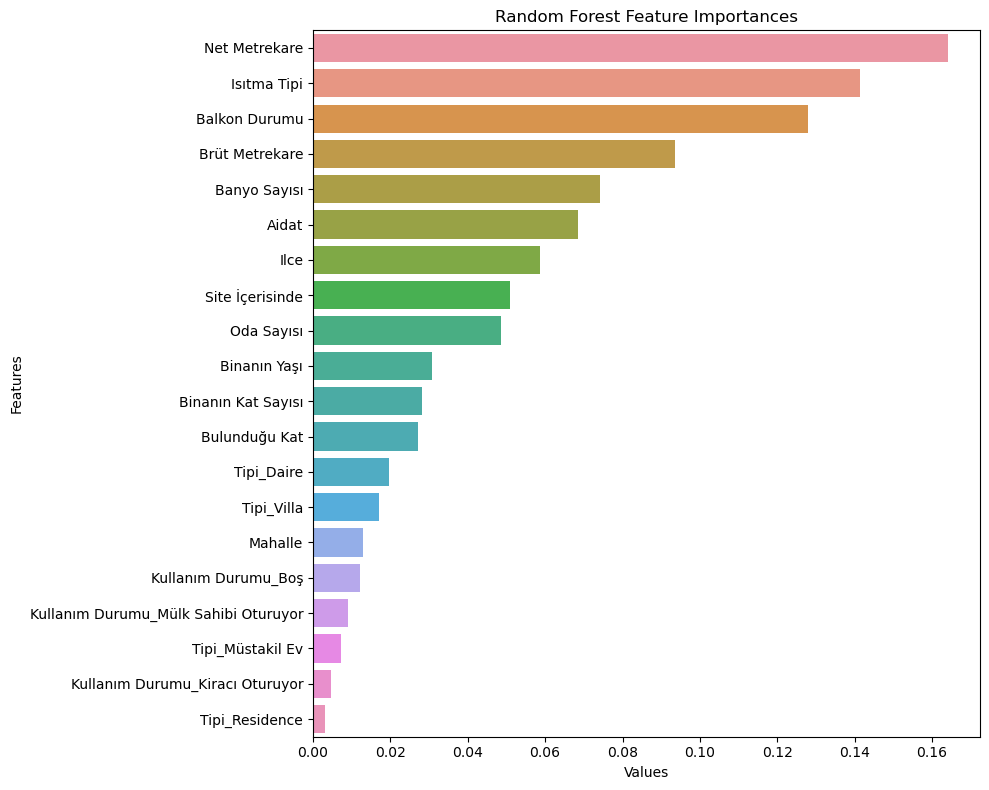

In [61]:
plot_importance(importances)

In [95]:
X_ham = df_copy.drop(["Fiyat"], axis=1) 
y = df_copy["Fiyat"]

full_pipeline = Pipeline([
    ('preprocessor', preprocessor),  
    ('scaler', StandardScaler()),    
    ('model', XGBRegressor(**best_params)) 
])

full_pipeline.fit(X_ham, y) 

joblib.dump(full_pipeline, 'model_pipeline.pkl')

['model_pipeline.pkl']

In [98]:
model = joblib.load('model_pipeline.pkl')

yeni_ev = pd.DataFrame({
    'Ilce': ['Çankaya'],          
    'Mahalle': ['Emek'],          
    'Tipi': ['Daire'],
    'Kullanım Durumu': ['Boş'],

    'Binanın Yaşı': ['5-10'],
    'Bulunduğu Kat': ['3.Kat'],
    'Site İçerisinde': ['Hayır'],
    'Isıtma Tipi': ['Kombi Doğalgaz'],
    'Banyo Sayısı': ['1'],
    'Oda Sayısı': ['3+1'],
    'Balkon Durumu': ['Var'],
    

    'Binanın Kat Sayısı': [5],
    'Aidat': [500],
    'Net Metrekare': [110], 
    'Brüt Metrekare': [130] 
})

tahmin = model.predict(yeni_ev)

print("-" * 40)
print(f"Ev Özellikleri:\n{yeni_ev.iloc[0].to_dict()}")
print("-" * 40)
print(f"TAHMİNİ FİYAT: {tahmin[0]:,.2f} TL")

----------------------------------------
Ev Özellikleri:
{'Ilce': 'Çankaya', 'Mahalle': 'Emek', 'Tipi': 'Daire', 'Kullanım Durumu': 'Boş', 'Binanın Yaşı': '5-10', 'Bulunduğu Kat': '3.Kat', 'Site İçerisinde': 'Hayır', 'Isıtma Tipi': 'Kombi Doğalgaz', 'Banyo Sayısı': '1', 'Oda Sayısı': '3+1', 'Balkon Durumu': 'Var', 'Binanın Kat Sayısı': 5, 'Aidat': 500, 'Net Metrekare': 110, 'Brüt Metrekare': 130}
----------------------------------------
TAHMİNİ FİYAT: 37,756.64 TL


In [ ]:
kullanım_durumu = ['Boş', 'Kiracı Oturuyor', 'Mülk Sahibi Oturuyor']
tipi = ['Daire', 'Villa', 'Residence', 'Müstakil Ev'] 
binanın_yaşı = ['0 (Yeni)', '1', '2', '3', '4', '5-10', '11-15', '16-20', '21 Ve Üzeri']
bulunduğu_kat = ['Kot 4 (-4).Kat','Kot 3 (-3).Kat','Kot 2 (-2).Kat','Kot 1 (-1).Kat','Bodrum Kat','Düz Giriş (Zemin)','Bahçe Katı','Müstakil','Yüksek Giriş','1.Kat','2.Kat','3.Kat','4.Kat','5.Kat','6.Kat','7.Kat','8.Kat','9.Kat','10.Kat','11.Kat','12.Kat','13.Kat','14.Kat','15.Kat','16.Kat','17.Kat','21.Kat','23.Kat','25.Kat','29.Kat','30.Kat','35.Kat', 'Çatı Katı', 'Çatı Dubleks' ]
site_içerisinde = ['Hayır', 'Evet']
ısıtma_tipi = ['Sobalı','Doğalgaz Sobalı','Klimalı','Kombi Fueloil','Merkezi Fueloil','Merkezi Doğalgaz','Merkezi (Pay Ölçer)','Kombi Doğalgaz','Yerden Isıtma']
banyo_sayısı = ['Yok','1','2','3','4','5','6+']
oda_sayısı = ['Stüdyo','1 Oda','1+1','2+0','1.5+1','2+1','3+0','2.5+1','3+1','2+2', '3.5+1','4+1','3+2','5+0','4.5+1','5+1','4+2','6+1','6+2','7+1','9+ Oda']
balkon_durumu = ['Yok', 'Var']
